In [ ]:
import matplotlib.pyplot as plt
import missingno
import numpy as np 
import pandas as pd 
from scipy.spatial.distance import pdist,cdist
import scipy.stats as stats
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler, QuantileTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix,f1_score, roc_auc_score,precision_score ,recall_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, HistGradientBoostingRegressor

# Funções Auxiliares

In [ ]:
def rmspe(y, y_resposta):
    value = np.sqrt(np.mean(np.square(((y - y_resposta) / y)), axis=0))
    return value

In [ ]:
def drop_outliers(avg, storage, number_of_elements):
  index_list = []
  for element in avg[-1*number_of_elements:]:
    index_list.extend(storage[element])
  return df.loc[~df.index.isin(index_list)]

# Carregamento do Dataset

In [ ]:
!pip install -q kaggle
!wget -O kaggle.json https://cdn.discordapp.com/attachments/539836343094870016/879014144483930142/kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c eel891-202101-trabalho-2
!unzip conjunto_de_treinamento.csv.zip 

--2021-08-23 23:57:00--  https://cdn.discordapp.com/attachments/539836343094870016/879014144483930142/kaggle.json
Resolving cdn.discordapp.com (cdn.discordapp.com)... 162.159.130.233, 162.159.135.233, 162.159.133.233, ...
Connecting to cdn.discordapp.com (cdn.discordapp.com)|162.159.130.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63 [application/json]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      63  --.-KB/s    in 0s      

2021-08-23 23:57:00 (24.6 MB/s) - ‘kaggle.json’ saved [63/63]

  0% 0.00/30.2k [00:00<?, ?B/s]
100% 30.2k/30.2k [00:00<00:00, 41.9MB/s]
  0% 0.00/177k [00:00<?, ?B/s]
100% 177k/177k [00:00<00:00, 56.1MB/s]
  0% 0.00/457k [00:00<?, ?B/s]
100% 457k/457k [00:00<00:00, 63.7MB/s]
unzip:  cannot find or open conjunto_de_treinamento.csv.zip, conjunto_de_treinamento.csv.zip.zip or conjunto_de_treinamento.csv.zip.ZIP.


In [ ]:
df = pd.read_csv("conjunto_de_treinamento.csv")
df_teste = pd.read_csv("conjunto_de_teste.csv")

# Informações do dataset

## Identificação de valores nulos

Com a criação dessa visualização abaixo, foi possível perceber que os dados de treino não possuem valores nulos.

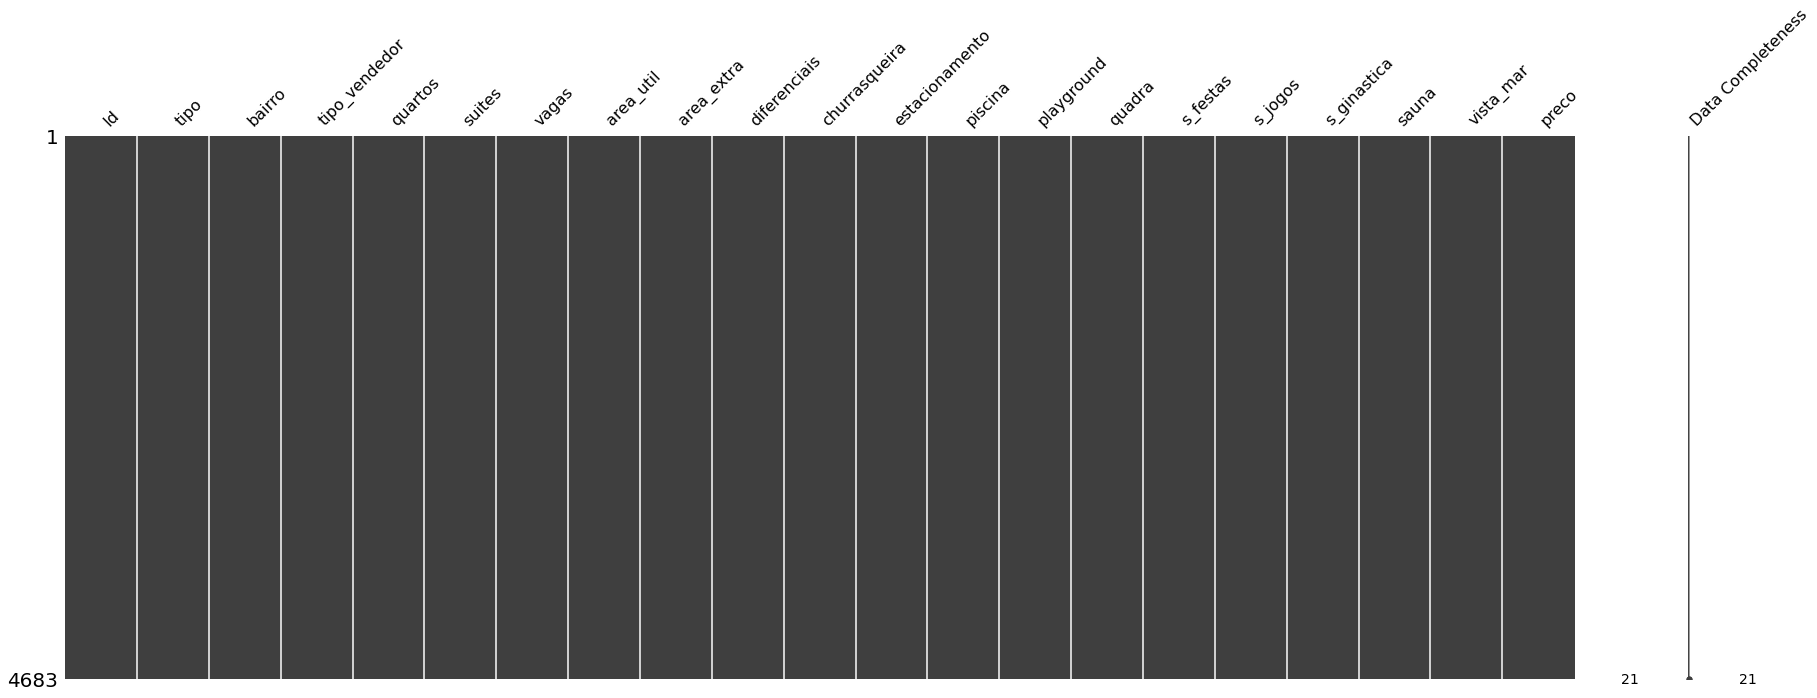

In [ ]:
missingno.matrix(df, labels=True, figsize=(30,10))

## Tipo das colunas

Utilizando o .dtypes, é possível observar todos os tipos de dados das colunas, e podemos ver que tem alguns tipos que não são numéricos.

In [ ]:
df.dtypes

Id                  int64
tipo               object
bairro             object
tipo_vendedor      object
quartos             int64
suites              int64
vagas               int64
area_util           int64
area_extra          int64
diferenciais       object
churrasqueira       int64
estacionamento      int64
piscina             int64
playground          int64
quadra              int64
s_festas            int64
s_jogos             int64
s_ginastica         int64
sauna               int64
vista_mar           int64
preco             float64
dtype: object

### Colunas do tipo object e seus valores

Observando melhor algumas variáveis abaixo, é possível perceber que algumas delas podemos utilizar mecanismos de encoding como One-hot-encoding e LabelBinarizer

In [ ]:
print("\n'tipo':\n", df['tipo'].value_counts())
print("\n'tipo' - Conjunto teste:\n", df_teste['tipo'].value_counts())

print("\n'tipo_vendedor':\n", df['tipo_vendedor'].value_counts())
print("\n'tipo_vendedor'- Conjunto teste:\n", df_teste['tipo_vendedor'].value_counts())

print("\n'bairro':\n", df['bairro'].value_counts())
print("\n'bairro'- Conjunto teste:\n", df_teste['bairro'].value_counts())

print("\n'diferenciais':\n", df['diferenciais'].value_counts())
print("\n'diferenciais'- Conjunto teste:\n", df_teste['diferenciais'].value_counts())


'tipo':
 Apartamento    4501
Casa            177
Loft              3
Quitinete         2
Name: tipo, dtype: int64

'tipo' - Conjunto teste:
 Apartamento    1924
Casa             75
Loft              1
Name: tipo, dtype: int64

'tipo_vendedor':
 Imobiliaria      4556
Pessoa Fisica     127
Name: tipo_vendedor, dtype: int64

'tipo_vendedor'- Conjunto teste:
 Imobiliaria      1958
Pessoa Fisica      42
Name: tipo_vendedor, dtype: int64

'bairro':
 Boa Viagem      1599
Madalena         327
Torre            240
Casa Amarela     225
Espinheiro       208
                ... 
Centro             1
Cohab              1
Zumbi              1
Sto Antonio        1
Coelhos            1
Name: bairro, Length: 66, dtype: int64

'bairro'- Conjunto teste:
 Boa Viagem           704
Madalena             145
Casa Amarela          97
Rosarinho             85
Casa Forte            81
Torre                 80
Espinheiro            75
Gracas                73
Parnamirim            57
Encruzilhada          54
Pin

## Descrição dos dados (Média, Contagem, Mínimo, Máximo)

Com essa visualização, além de ter mais informações sobre os tipos de dados e seus valores.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,4683.0,4341.000000,1.352010e+03,2000.0,3170.5,4341.0,5511.5,6682.0
quartos,4683.0,3.043562,8.735901e-01,1.0,3.0,3.0,4.0,9.0
suites,4683.0,1.434337,1.102457e+00,0.0,1.0,1.0,2.0,6.0
vagas,4683.0,1.708093,1.210975e+00,0.0,1.0,2.0,2.0,30.0
area_util,4683.0,124.158018,1.073651e+02,21.0,68.0,96.0,149.0,2045.0
area_extra,4683.0,13.293188,2.668038e+02,0.0,0.0,0.0,0.0,17450.0
churrasqueira,4683.0,0.316891,4.653142e-01,0.0,0.0,0.0,1.0,1.0
estacionamento,4683.0,0.030750,1.726567e-01,0.0,0.0,0.0,0.0,1.0
piscina,4683.0,0.555627,4.969491e-01,0.0,0.0,1.0,1.0,1.0
playground,4683.0,0.157378,3.641954e-01,0.0,0.0,0.0,0.0,1.0


# Tratamento do dataset

## Encoding de colunas

In [ ]:
# Aplicando binarização na variavel "tipo_vendedor"
binarizador = LabelBinarizer()

for t in ['tipo_vendedor']:
    df[t] = binarizador.fit_transform(df[t])
    df_teste[t] = binarizador.fit_transform(df_teste[t])
    
print("\n'tipo_vendedor':\n", df['tipo_vendedor'].value_counts())


'tipo_vendedor':
 0    4556
1     127
Name: tipo_vendedor, dtype: int64


Ao observar melhor também é possível perceber que os dados de teste e treino possuem uma pequena quantidade de valores para o tipo quitinete e tipo loft, deste modo, para melhorar o resultado, foi optado por remover essas ocorrências.

In [ ]:
# Codificando o tipo do imovel com one-hot-encoding
df = pd.get_dummies(df, columns=['tipo'])
df = df[df['tipo_Quitinete']==0]
df = df[df['tipo_Loft']==0]

df_teste = pd.get_dummies(df_teste, columns=['tipo'])

# Excluindo as colunas 'tipo_Loft' do conjunto de treino e teste
df_teste = df_teste.drop(['tipo_Loft'], axis=1)
df = df.drop(['tipo_Loft'], axis=1)

# Excluindo a coluna 'tipo_Quitinete'
df = df.drop(['tipo_Quitinete'], axis=1)

Além disso, foi aplicado um LabelEncoder para o campo bairro, para manter esse valor como o tipo float

In [ ]:
df['bairro'] = LabelEncoder().fit_transform(df['bairro'])
df_teste['bairro'] = LabelEncoder().fit_transform(df_teste['bairro'])

# Normalização dos dados
df['bairro'] = (df['bairro'] - df['bairro'].mean()) / df_teste['bairro'].std()
df_teste['bairro'] = (df['bairro'] - df['bairro'].mean()) / df_teste['bairro'].std()

Ademais, foi notado que a coluna diferenciais é na verdade uma combinação das colunas de churrasqueira, playground, quadra e etc. Portanto, foi optado por remover essa coluna, tendo em vista que esses dados já estarão inclusos em outras colunas e de uma forma binarizada.

In [ ]:
df = df.drop(['diferenciais'], axis=1)
df_teste = df_teste.drop(['diferenciais'], axis=1)

## Verificação de Outliers

Ao observar o gráfico da distância euclidiana é possível observar que existe uma pequena quantidade de outliers. "Dando um zoom" no gráfico é possível encontrar que são basicamente 10 valores dentre os valores do dataframe. Portanto foi optado por removê-los cerca de 2% final do dataframe.

Text(0.5, 1.0, 'Média da Distância Euclidiana')

<Figure size 432x288 with 0 Axes>

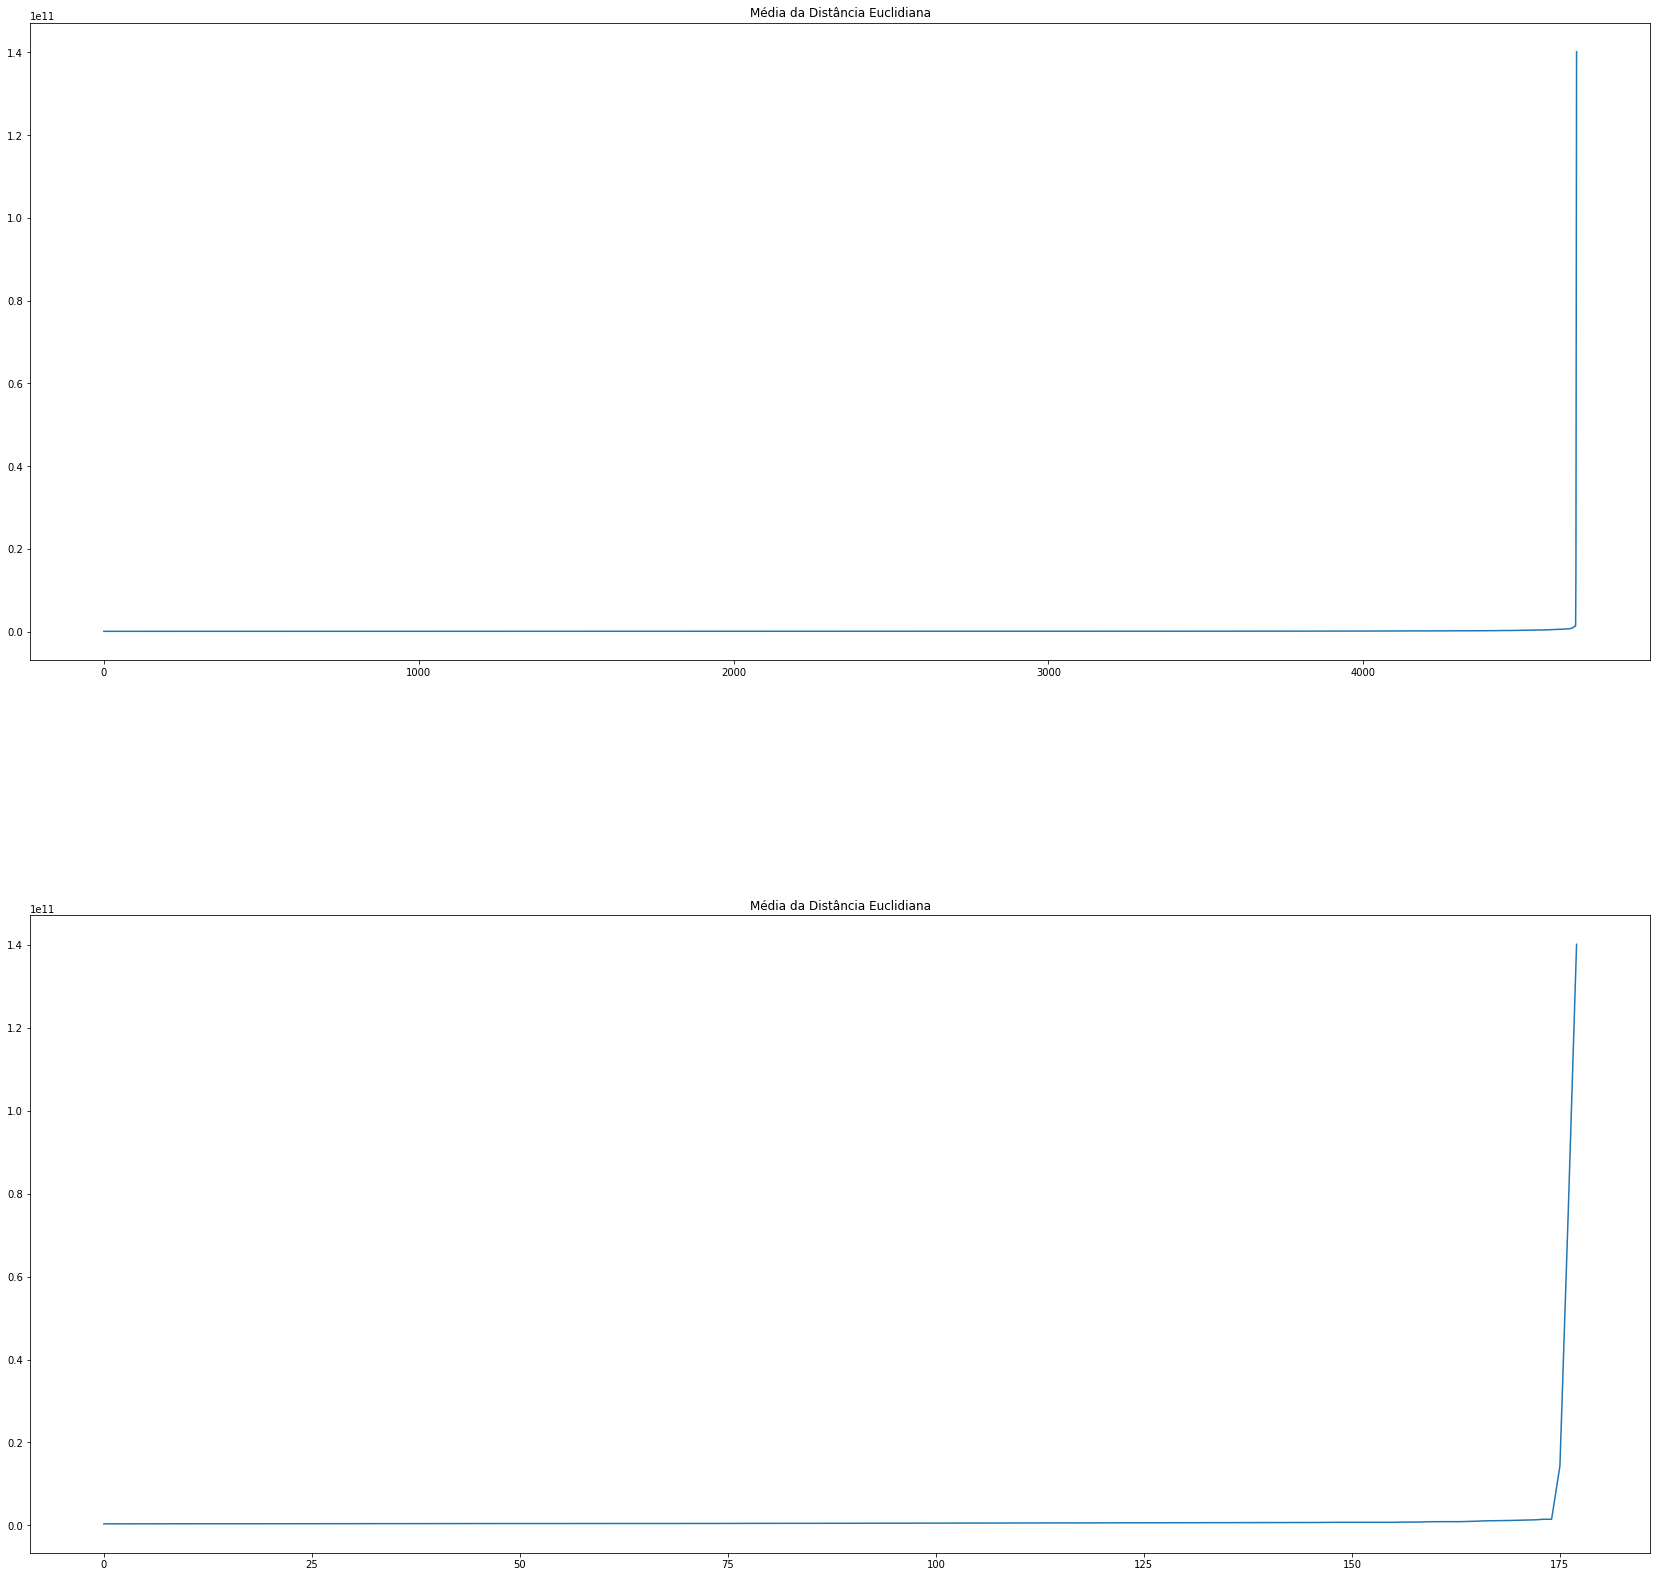

In [ ]:
x = pdist(df.values, 'euclid')
values_number = len(df.values)
columns_number = len(df.columns)
avg = []
storage = {}

for i in range(values_number):
  sum = 0
  for j in range(i):
    sum += x[values_number * j + i - ((j + 2) * (j + 1)) // 2]
  for j in range(i + 1, values_number):
    sum += x[values_number * i + j - ((i + 2) * (i + 1)) // 2]
  result = sum/columns_number
  avg.append(result)

  if result not in storage:
    storage[result] = [i]
  else:
    storage[result].append(i)


plt.figure()
fig, axs = plt.subplots(2, 1, figsize=(25, 25))
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
avg.sort()

axs[0].plot(avg)
axs[0].set_title('Média da Distância Euclidiana')

axs[1].plot(avg[4500:])
axs[1].set_title('Média da Distância Euclidiana')

In [ ]:
df = drop_outliers(avg, storage, 48*2)

## Coeficiente de Pearson

In [ ]:
print('\n           Coluna   Coef. Pears.   Confianca')
print('  ----------------   ------------   ---------')

for col in df.columns:
    print( ' %16s   %12.4f   %9.4f' % (col, 
                                       pearsonr(df[col],df['preco'])[0], 
                                       pearsonr(df[col],df['preco'])[1]))


           Coluna   Coef. Pears.   Confianca
  ----------------   ------------   ---------
               Id         0.0200      0.1767
           bairro         0.0074      0.6172
    tipo_vendedor         0.1006      0.0000
          quartos         0.0422      0.0043
           suites         0.0706      0.0000
            vagas         0.0507      0.0006
        area_util         0.0605      0.0000
       area_extra         0.0037      0.8040
    churrasqueira        -0.0066      0.6531
   estacionamento        -0.0084      0.5677
          piscina        -0.0104      0.4817
       playground        -0.0135      0.3592
           quadra        -0.0045      0.7614
         s_festas         0.0270      0.0677
          s_jogos        -0.0029      0.8439
      s_ginastica        -0.0015      0.9176
            sauna         0.0113      0.4430
        vista_mar         0.0186      0.2091
            preco         1.0000      0.0000
 tipo_Apartamento        -0.0239      0.1054
        

Tendo executado o coeficiente de pearson para verificar quais são as colunas que mais se relacionam com a variável alvo, foi possível definir quais seriam as colunas que iriam ser removidas do df a fim de obter um resultado mais acurado.

In [ ]:
df = df.drop(['Id', 'tipo_vendedor', 'churrasqueira', 'quadra', 's_jogos', 's_ginastica', 'area_extra'], axis=1)
df_teste = df_teste.drop(['Id', 'tipo_vendedor', 'churrasqueira', 'quadra', 's_jogos', 's_ginastica', 'area_extra'], axis=1)

# Análise

## Dataset de treino e teste

Tendo feito todo o tratamento considerado necessário para o dataset, foi separado x e y em conjunto de treino e teste dentro do df de treino para poder realizar o cálculo da precisão do modelo

In [ ]:
x = df.drop(['preco'], axis=1).to_numpy()
y = df['preco'].to_numpy()

x_TESTE = df_teste.iloc[:,:].to_numpy()

# Esse dataframe com id será utilizado para a resposta final
y_TESTE_Id = df_teste.iloc[:,0]

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=100)

## Gradient Boosting

Para o gradient boosting o valor do modelo RMSPE obtido foi de 0.2339 no conjunto de teste

Para verificar qual era o melhor hyperparâmetro, foi alterado o l2_regularization e o max_iter para verificar quais seriam os melhores valores e quais os hyperparâmetros utilizados. Além disso, foi alterado o método de cálculo de loss para verificar se havia alguma interferência no código e o max_depth para verificar se a profundidade de cada folha influenciava no resultado.

In [ ]:
results = []
for i in range(2, 36, 2):  
  for j in range(10, 150, 10):  
    for k in ['least_absolute_deviation', 'least_squares']:
      for l in range(2, 14, 2):
        rgsGB = HistGradientBoostingRegressor(l2_regularization=i, max_iter=j, loss=k, max_depth=l)

        rgsGB = rgsGB.fit(x_treino, y_treino)

        y_resposta_treino = rgsGB.predict(x_treino)
        y_resposta_teste = rgsGB.predict(x_teste)

        rmspe_in = rmspe(y_treino, y_resposta_treino)
        rmspe_out = rmspe(y_teste, y_resposta_teste)
        results.append((l, k, j, i, rmspe_in, rmspe_out))

In [ ]:
best_choose = sorted(results, key=lambda i: i[-1], reverse=True)
print (best_choose[-1])

(12, 'least_absolute_deviation', 140, 34, 4.812977682763856, 0.23398788949897614)


Definindo o melhor max_iter, pudemos então obter o valor do rmspe para o Gradient Boosting

In [ ]:
  rgsGB = HistGradientBoostingRegressor(l2_regularization=34, max_iter=140, loss='least_absolute_deviation', max_depth=12)

  rgsGB = rgsGB.fit(x_treino, y_treino)

  y_resposta_treino = rgsGB.predict(x_treino)
  y_resposta_teste = rgsGB.predict(x_teste)

  rmspe_in = rmspe(y_treino, y_resposta_treino)
  rmspe_out = rmspe(y_teste, y_resposta_teste)
  print(f'rmspe_in {rmspe_in}, rmspe_out {rmspe_out}')

rmspe_in 0.02191194781074682, rmspe_out 0.01736005955199135


## Random Forest

Para obter um melhor número de estimators, foram variados os valores de 100 até 1500 a fim de observar o valor do rmspe

In [ ]:
for i in range(100, 1500, 100):
  rgsRF = RandomForestRegressor(n_estimators=i,random_state=0,min_samples_leaf=2,n_jobs=10,criterion='mse',verbose=0)

  rgsRF = rgsRF.fit(x_treino, y_treino)

  y_resposta_treino = rgsRF.predict(x_treino)
  y_resposta_teste = rgsRF.predict(x_teste)

  rmspe_in = rmspe(y_treino, y_resposta_treino)
  rmspe_out = rmspe(y_teste, y_resposta_teste)
  print(f'n_estimators {i}, rmspe_in {rmspe_in}, rmspe_out {rmspe_out}')

n_estimators 100, rmspe_in 0.0004986217836076697, rmspe_out 0.0008574369566376522
n_estimators 200, rmspe_in 0.0004811986386206591, rmspe_out 0.0008332383566660251
n_estimators 300, rmspe_in 0.0004808130812097383, rmspe_out 0.000822922894686526
n_estimators 400, rmspe_in 0.0004818888272688115, rmspe_out 0.0008264086810064597
n_estimators 500, rmspe_in 0.0004898823262604653, rmspe_out 0.0008252600472609865
n_estimators 600, rmspe_in 0.0004844675554111296, rmspe_out 0.0008074903633544216
n_estimators 700, rmspe_in 0.00048781973616685747, rmspe_out 0.0008089773091041762
n_estimators 800, rmspe_in 0.0004863176911073888, rmspe_out 0.0008161752635314236


KeyboardInterrupt: ignored

Com base no resultado anterior, o melhor número de estimators foi de 1400

In [ ]:
for i in range(2, 12, 2):
  rgsRF = RandomForestRegressor(n_estimators=1400,random_state=0,min_samples_leaf=i,n_jobs=10,criterion='mse',verbose=0)

  rgsRF = rgsRF.fit(x_treino, y_treino)

  y_resposta_treino = rgsRF.predict(x_treino)
  y_resposta_teste = rgsRF.predict(x_teste)

  rmspe_in = rmspe(y_treino, y_resposta_treino)
  rmspe_out = rmspe(y_teste, y_resposta_teste)
  print(f'min_samples_leaf {i}, rmspe_in {rmspe_in}, rmspe_out {rmspe_out}')

min_samples_leaf 2, rmspe_in 7.553756032949039, rmspe_out 7.845478753608698
min_samples_leaf 4, rmspe_in 6.540657604192398, rmspe_out 9.802996682041211
min_samples_leaf 6, rmspe_in 6.175483646121599, rmspe_out 8.494258435921926
min_samples_leaf 8, rmspe_in 5.801130983145787, rmspe_out 6.403402324786742
min_samples_leaf 10, rmspe_in 5.433428083803387, rmspe_out 4.7229844977347595


Com base no menor valor obtido de min_samples_leaf, foi continuada a busca pela variação dos outros hiperparâmetros a fim de melhorar os resultados

In [ ]:
for i in range(2, 6, 2):
  rgsRF = RandomForestRegressor(n_estimators=1400,random_state=0,min_samples_leaf=2,n_jobs=i,criterion='mse',verbose=0)

  rgsRF = rgsRF.fit(x_treino, y_treino)

  y_resposta_treino = rgsRF.predict(x_treino)
  y_resposta_teste = rgsRF.predict(x_teste)

  rmspe_in = rmspe(y_treino, y_resposta_treino)
  rmspe_out = rmspe(y_teste, y_resposta_teste)
  print(f'n_jobs {i}, rmspe_in {rmspe_in}, rmspe_out {rmspe_out}')

n_jobs 2, rmspe_in 7.553756032949039, rmspe_out 7.845478753608698
n_jobs 4, rmspe_in 7.55375603294904, rmspe_out 7.845478753608697


Após a execução foi observado que o n_jobs não alterava no resultado obtido, portanto, ao final da mudança dos hiperparâmetros o resultado obtido foi o seguinte

In [ ]:
rgsRF = RandomForestRegressor(n_estimators=1400,random_state=0,min_samples_leaf=2,n_jobs=2,criterion='mse',verbose=0)

rgsRF = rgsRF.fit(x_treino, y_treino)

y_resposta_treino = rgsRF.predict(x_treino)
y_resposta_teste = rgsRF.predict(x_teste)

rmspe_in = rmspe(y_treino, y_resposta_treino)
rmspe_out = rmspe(y_teste, y_resposta_teste)
print(f'rmspe_in {rmspe_in}, rmspe_out {rmspe_out}')

rmspe_in 7.553756032949039, rmspe_out 7.845478753608698


## Regressor Polinomial

Para este método, foram variados os graus do regressor polinomial a fim de observar o resultado do rmspe

In [ ]:
for k in range(1,4):
    pf = PolynomialFeatures(degree=k)    
    pf = pf.fit(x_treino)
    x_treino_poly = pf.transform(x_treino)
    x_teste_poly = pf.transform(x_teste)
    
    rgsL = LinearRegression()
    rgsL = rgsL.fit(x_treino_poly,y_treino)

    y_resposta_treino = rgsL.predict(x_treino_poly)
    y_resposta_teste = rgsL.predict(x_teste_poly)
    
    rmspe_in = rmspe(y_treino, y_resposta_treino)
    rmspe_out = rmspe(y_teste, y_resposta_teste)
    
    n_atributos = x_treino_poly.shape[1]    

    print(f'K {k} rmspe_in {rmspe_in}, rmspe_out {rmspe_out}')

K 1 rmspe_in 10.569558874443272, rmspe_out 1.0819791482095051
K 2 rmspe_in 3.098481889918608, rmspe_out 2.7913308237213244
K 3 rmspe_in 17.460304128192746, rmspe_out 19.057502312172907


## KNN

In [ ]:
for k in range(2,42,2):
    rgsKNN = KNeighborsRegressor(n_neighbors=k, p=1, n_jobs=2, algorithm='kd_tree', weights='distance')
    
    rgsKNN = rgsKNN.fit(x_treino, y_treino)

    y_resposta_treino = rgsKNN.predict(x_treino)
    y_resposta_teste = rgsKNN.predict(x_teste)
        
    rmspe_in = rmspe(y_treino, y_resposta_treino)
    rmspe_out = rmspe(y_teste, y_resposta_teste)

    print(f'K {k}, rmspe_in {rmspe_in}, rmspe_out {rmspe_out}')

K 2, rmspe_in 0.06296370261421147, rmspe_out 23.70717275729037
K 4, rmspe_in 0.059405306036603135, rmspe_out 13.358207223226241
K 6, rmspe_in 0.05923094960357025, rmspe_out 10.049076032722988
K 8, rmspe_in 0.05922805221558205, rmspe_out 8.067694681480823
K 10, rmspe_in 0.05922805221558205, rmspe_out 6.758685167684494
K 12, rmspe_in 0.05922805221558205, rmspe_out 5.845974576848896
K 14, rmspe_in 0.05922805221558205, rmspe_out 5.198878523805399
K 16, rmspe_in 0.05922805221558205, rmspe_out 4.683618336300183
K 18, rmspe_in 0.05922805221558205, rmspe_out 4.270240665052728
K 20, rmspe_in 0.05922805221558205, rmspe_out 3.9404638254975595
K 22, rmspe_in 0.05922805221558205, rmspe_out 3.6592280613467842
K 24, rmspe_in 0.05922805221558205, rmspe_out 3.41855501737781
K 26, rmspe_in 0.05922805221558205, rmspe_out 3.2144072797314025
K 28, rmspe_in 0.05922805221558205, rmspe_out 3.0295076562970915
K 30, rmspe_in 0.05922805221558205, rmspe_out 2.8748262678051875
K 32, rmspe_in 0.05922805221558205, r

O melhor valor obtido com a variação de K para o KNN foi de k=10, portanto foi prosseguida com a mudança dos hiperparâmetros

In [ ]:
for p in range(1,11):
    rgsKNN = KNeighborsRegressor(n_neighbors=10, p=p, n_jobs=2, algorithm='kd_tree', weights='distance')
    
    rgsKNN = rgsKNN.fit(x_treino,y_treino)

    y_resposta_treino = rgsKNN.predict(x_treino)
    y_resposta_teste = rgsKNN.predict(x_teste)
        
    rmspe_in = rmspe(y_treino, y_resposta_treino)
    rmspe_out = rmspe(y_teste, y_resposta_teste)

    print(f'P {p}, rmspe_in {rmspe_in}, rmspe_out {rmspe_out}')

P 1, rmspe_in 0.05922805221558205, rmspe_out 6.758685167684494
P 2, rmspe_in 0.05922805221558205, rmspe_out 5.248769557647506
P 3, rmspe_in 0.05922805221558205, rmspe_out 4.864365301858856
P 4, rmspe_in 0.05922805221558205, rmspe_out 4.672049754536907
P 5, rmspe_in 0.05922805221558205, rmspe_out 4.548993639687858
P 6, rmspe_in 0.05922805221558205, rmspe_out 4.477930710833311
P 7, rmspe_in 0.05922805221558205, rmspe_out 4.428493759876277
P 8, rmspe_in 0.05922805221558205, rmspe_out 4.391962877363551
P 9, rmspe_in 0.05922805221558205, rmspe_out 4.383888392863805
P 10, rmspe_in 0.05922805221558205, rmspe_out 4.362293095293669


Após isso, o melhor resultado obtido para o KNN foi

In [ ]:
rgsKNN = KNeighborsRegressor(n_neighbors=10, p=1, n_jobs=2, algorithm='kd_tree', weights='distance')

rgsKNN = rgsKNN.fit(x_treino,y_treino)

y_resposta_treino = rgsKNN.predict(x_treino)
y_resposta_teste = rgsKNN.predict(x_teste)
    
rmspe_in = rmspe(y_treino, y_resposta_treino)
rmspe_out = rmspe(y_teste, y_resposta_teste)

print(f'rmspe_in {rmspe_in}, rmspe_out {rmspe_out}')

rmspe_in 0.05922805221558205, rmspe_out 6.758685167684494


Tendo feito os testes com alguns dos modelos acima, o melhor resultado obtido foi utilizando o Gradient Boosting, que foi o modelo utilizado para gerar o resultado submetido ao Kaggle.

# Resultado Final

Após testados alguns modelos, dentre os escolhidos, o melhor foi o Gradient Boosting, deste modo, este foi utilizado para utilizar a resposta a ser enviada ao Kaggle.

Foi interessante observar também que o resultado obtido no código do google colab foi um pouco diferente do obtido no kaggle, porém ainda assim foram os melhores hiper parâmetros escolhidos.

In [ ]:
y_resposta_TESTE = rgsGB.predict(x_TESTE)
d = {'Id': y_TESTE_Id.index , 'preco': y_resposta_TESTE}
df = pd.DataFrame(data=d)

df.to_csv('out.csv', index=False)
dados_output = pd.read_csv("out.csv")